# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [4]:
# read the iris data into a pandas DataFrame, including column names
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Task 2

In [6]:
# gather basic information
#we will make EDA
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Task 3

In [15]:
# use groupby to look for differences between the species
species_stats = df.groupby('species').mean()
species_stats

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [17]:
# use sorting to look for differences between the species
sorted_by_sepal_length = species_stats.sort_values(by='sepal_length', ascending=False)
sorted_by_sepal_length

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
virginica,6.588,2.974,5.552,2.026
versicolor,5.936,2.770,4.260,1.326
setosa,5.006,3.418,1.464,0.244


In [19]:
sorted_by_sepal_width = species_stats.sort_values(by='sepal_width', ascending=False)
sorted_by_sepal_width

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
virginica,6.588,2.974,5.552,2.026
versicolor,5.936,2.770,4.260,1.326


In [21]:
sorted_by_petal_length = species_stats.sort_values(by='petal_length', ascending=False)
sorted_by_petal_length

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
virginica,6.588,2.974,5.552,2.026
versicolor,5.936,2.770,4.260,1.326
setosa,5.006,3.418,1.464,0.244


In [23]:
sorted_by_petal_width = species_stats.sort_values(by='petal_width', ascending=False)
sorted_by_petal_width

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
virginica,6.588,2.974,5.552,2.026
versicolor,5.936,2.770,4.260,1.326
setosa,5.006,3.418,1.464,0.244


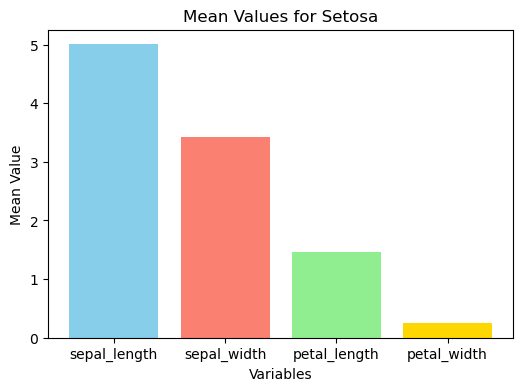

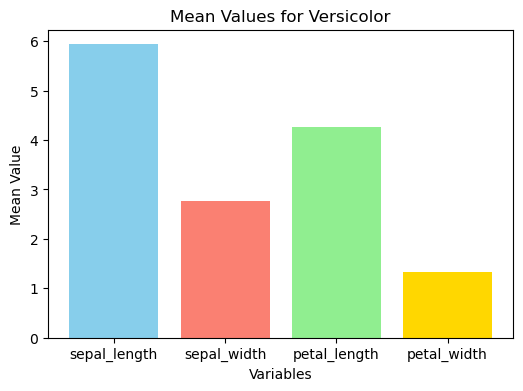

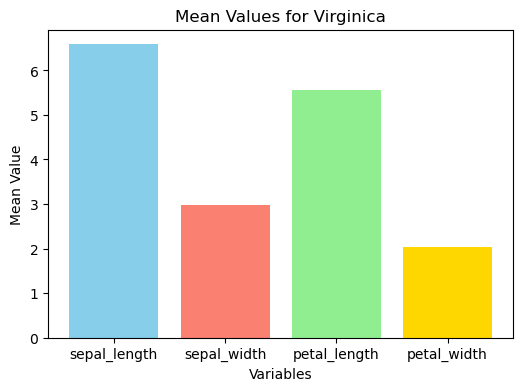

In [29]:
# use plotting to look for differences between the species
# Facet grid showing distribution of each variable by species
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
species = species_stats.index  # Get unique species names
variables = species_stats.columns  # Variables to plot

for s in species:
    plt.figure(figsize=(6, 4))
    plt.bar(variables, species_stats.loc[s], color=['skyblue', 'salmon', 'lightgreen', 'gold'])
    plt.title(f'Mean Values for {s.capitalize()}')
    plt.xlabel('Variables')
    plt.ylabel('Mean Value')
    plt.show()



Species to Numeric Mapping: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


C:\Users\prome\AppData\Local\Temp\ipykernel_8828\3411698685.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y=variable, data=species_means, palette=palette)


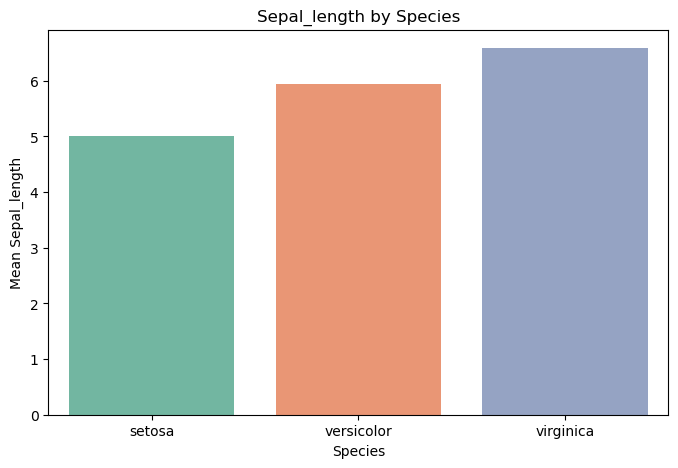

C:\Users\prome\AppData\Local\Temp\ipykernel_8828\3411698685.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y=variable, data=species_means, palette=palette)


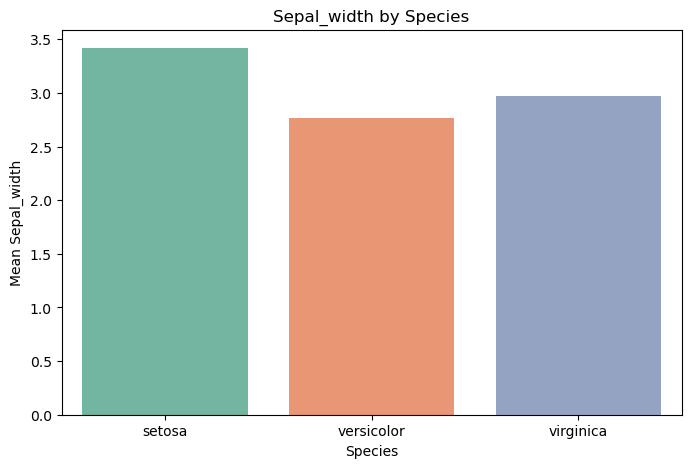

C:\Users\prome\AppData\Local\Temp\ipykernel_8828\3411698685.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y=variable, data=species_means, palette=palette)


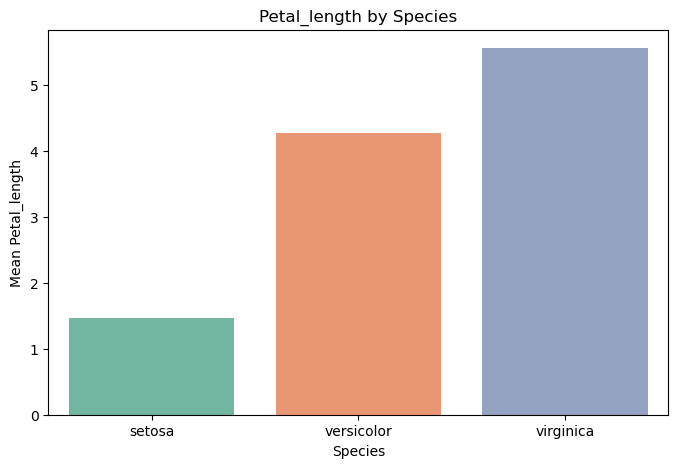

C:\Users\prome\AppData\Local\Temp\ipykernel_8828\3411698685.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y=variable, data=species_means, palette=palette)


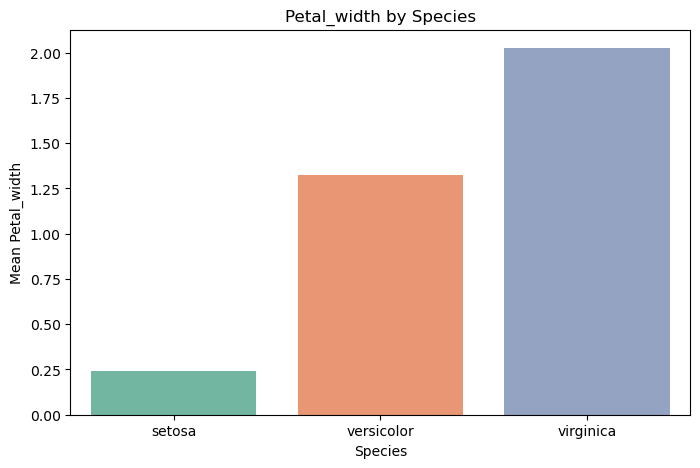

In [31]:
# map species to a numeric value so that plots can be colored by category
df['species_code'], species_labels = pd.factorize(df['species'])
print("Species to Numeric Mapping:", dict(zip(species_labels, range(len(species_labels)))))

# Calculate the mean for each species
species_means = df.groupby('species').mean().reset_index()
species_means['species_code'] = pd.factorize(species_means['species'])[0]

# Plot each variable by species with color-coded bars
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
palette = sns.color_palette("Set2", len(species_labels))

for variable in variables:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='species', y=variable, data=species_means, palette=palette)
    plt.title(f'{variable.capitalize()} by Species')
    plt.xlabel('Species')
    plt.ylabel(f'Mean {variable.capitalize()}')
    plt.show()

## Task 4

In [35]:
# Group by species
grouped = df.groupby('species')

# Calculate mean and standard deviation for each variable by species
means = grouped.mean(numeric_only=True)
std_devs = grouped.std(numeric_only=True)

# Calculate correlations for each species
correlations = {species: grouped.get_group(species).drop(columns='species').corr() for species in df['species'].unique()}

print("Mean values for each species:\n", means, "\n")
print("Standard deviation for each species:\n", std_devs, "\n")
print("Correlations for each species:")

# Display correlation matrices for each species
for species, corr in correlations.items():
    print(f"\nCorrelation matrix for {species}:\n", corr)


Mean values for each species:
             sepal_length  sepal_width  petal_length  petal_width  species_code
species                                                                       
setosa             5.006        3.418         1.464        0.244           0.0
versicolor         5.936        2.770         4.260        1.326           1.0
virginica          6.588        2.974         5.552        2.026           2.0 

Standard deviation for each species:
             sepal_length  sepal_width  petal_length  petal_width  species_code
species                                                                       
setosa          0.352490     0.381024      0.173511     0.107210           0.0
versicolor      0.516171     0.313798      0.469911     0.197753           0.0
virginica       0.635880     0.322497      0.551895     0.274650           0.0 

Correlations for each species:

Correlation matrix for setosa:
               sepal_length  sepal_width  petal_length  petal_width  \
sep

In [37]:
max_min_values = df.groupby('species').agg(['max', 'min'])
max_min_values

sepal_length      sepal_width      petal_length      petal_width  \
                    max  min         max  min          max  min         max   
species                                                                       
setosa              5.8  4.3         4.4  2.3          1.9  1.0         0.6   
versicolor          7.0  4.9         3.4  2.0          5.1  3.0         1.8   
virginica           7.9  4.9         3.8  2.2          6.9  4.5         2.5   

                species_code      
            min          max min  
species                           
setosa      0.1            0   0  
versicolor  1.0            1   1  
virginica   1.4            2   2